## Recreating figure 3.7 from Bishop's "Pattern Recognition and Machine Learning."

This notebook provides scaffolding for your exploration Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, through this notebook you will reproduce several variants of figure 3.7 from Bishop's book.

## Instructions:

### 5.1-3:

Implement the functions in `problem` -- completed implementations of these functions are needed to generate the plots.

In [1]:
from support_code import *
from problem import *

In [2]:
import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np
import support_code

def likelihood_func(w, X, y_train, likelihood_var):
    '''
    Implement likelihood_func. This function returns the data likelihood
    given f(y_train | X; w) ~ Normal(Xw, likelihood_var).

    Args:
        w: Weights
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''

    #TO DO
    num_ins=X.shape[0]
    likelihood=1.0
    for i in range(num_ins):
        ml=multivariate_normal.pdf(y_train[i], np.dot(X[i],w), likelihood_var)
        likelihood*=ml
    return likelihood

In [3]:
def get_posterior_params(X, y_train, prior, likelihood_var = 0.2**2):
    '''
    Implement get_posterior_params. This function returns the posterior
    mean vector \mu_p and posterior covariance matrix \Sigma_p for
    Bayesian regression (normal likelihood and prior).

    Note support_code.make_plots takes this completed function as an argument.

    Args:
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        prior: Prior parameters; dict with 'mean' (prior mean np.matrix)
               and 'var' (prior covariance np.matrix)
        likelihood_var: likelihood variance- default (0.2**2) per the lecture slides

    Returns:
        post_mean: Posterior mean (np.matrix)
        post_var: Posterior mean (np.matrix)
    '''

    # TO DO
    mean_MP=np.linalg.inv(np.dot(X.T,X)+likelihood_var*np.linalg.inv(prior['var']))
    post_mean=np.dot(np.dot(mean_MP,X.T),y_train)
    post_var=np.linalg.inv(1/likelihood_var*np.dot(X.T,X)+np.linalg.inv(prior['var']))
    return post_mean, post_var

In [4]:
def get_predictive_params(X_new, post_mean, post_var, likelihood_var = 0.2**2):
    '''
    Implement get_predictive_params. This function returns the predictive
    distribution parameters (mean and variance) given the posterior mean
    and covariance matrix (returned from get_posterior_params) and the
    likelihood variance (default value from lecture).

    Args:
        X_new: New observation (np.matrix object)
        post_mean, post_var: Returned from get_posterior_params
        likelihood_var: likelihood variance (0.2**2) per the lecture slides

    Returns:
        - pred_mean: Mean of predictive distribution
        - pred_var: Variance of predictive distribution
    '''

    # TO DO
    pred_mean=np.dot(post_mean.T,X_new)
    pred_var=np.sqrt(np.dot(np.dot(X_new.T,post_var),X_new)+likelihood_var)
    return pred_mean, pred_var

In [5]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np

'''
This is support code provided for the Bayesian Regression Problems.
The goal of this problem is to have you explore Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, the goal is to reproduce fig 3.7 from Bishop's book.

A few things to note about this code:
    - We strongly encourage you to review this support code prior to
      completing "problem.py"
    - For Problem (b), you are asked to generate plots for three
      values of sigma_squared. We suggest you save the plot generated
      by make_plots (instead of simply calling plt.show)
'''

def generate_data(data_size, noise_params, actual_weights):
    # x1: from [0,1) to [-1,1)
    x1 = -1 + 2 * np.random.rand(data_size, 1)
    # appending the bias term
    xtrain = np.matrix(np.c_[np.ones((data_size, 1)), x1])
    # random noise
    noise = np.matrix(np.random.normal(
                      noise_params["mean"],
                      noise_params["var"],
                      (data_size, 1)))

    ytrain = (xtrain * actual_weights) + noise

    return xtrain, ytrain

def make_plots(actual_weights, xtrain, ytrain, likelihood_var, prior, likelihood_func, get_posterior_params, get_predictive_params):

    # #setup for plotting
    #
    show_progress_till_data_rows = [1, 2, 10, -1]
    num_rows = 1 + len(show_progress_till_data_rows)
    num_cols = 4
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=.8, wspace=.8)

    plot_without_seeing_data(prior, num_rows, num_cols)

    # see data for as many rounds as specified and plot
    for round_num, row_num in enumerate(show_progress_till_data_rows):
        current_row = round_num + 1
        first_column_pos = (current_row * num_cols) + 1

        # #plot likelihood on latest point
        plt.subplot(num_rows, num_cols, first_column_pos)


        likelihood_func_with_data = lambda W: likelihood_func(W,
                                                      xtrain[:row_num,],
                                                      ytrain[:row_num],
                                                      likelihood_var)
        contour_plot(likelihood_func_with_data, actual_weights)

        # plot updated posterior on points seen till now
        x_seen = xtrain[:row_num]
        y_seen = ytrain[:row_num]
        mu, cov = get_posterior_params(x_seen, y_seen,
                                      prior, likelihood_var)
        posterior_distr = multivariate_normal(mu.T.tolist()[0], cov)
        posterior_func = lambda x: posterior_distr.pdf(x)
        plt.subplot(num_rows, num_cols, first_column_pos + 1)
        contour_plot(posterior_func, actual_weights)

        # plot lines
        data_seen = np.c_[x_seen[:, 1], y_seen]
        plt.subplot(num_rows, num_cols, first_column_pos + 2)
        plot_sample_lines(mu, cov, data_points=data_seen)

        # plot predictive
        plt.subplot(num_rows, num_cols, first_column_pos + 3)
        post_mean, post_var = get_posterior_params(x_seen, y_seen, prior)
        plot_predictive_distribution(get_predictive_params, post_mean, post_var)

    # #show the final plot
    plt.savefig('myfig.png')

def plot_without_seeing_data(prior, num_rows, num_cols):

    #Blank likelihood
    plt.subplot(num_rows, num_cols, 1, facecolor='grey')
    plt.title("Likelihood")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    #Prior
    prior_distribution = multivariate_normal(mean=prior["mean"].T.tolist()[0],
        cov=prior["var"])
    prior_func = lambda x:prior_distribution.pdf(x)
    plt.subplot(num_rows, num_cols, 2)
    plt.title("Prior/Posterior")
    contour_plot(prior_func)

    # Plot initially valid lines (no data seen)
    plt.subplot(num_rows, num_cols, 3)
    plt.title("Data Space")
    plot_sample_lines(prior["mean"], prior["var"])

    # Blank predictive
    plt.subplot(num_rows, num_cols, 4, facecolor='grey')
    plt.title('Predictive Distribution')
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("")
    plt.ylabel("")

def contour_plot(distribution_func, actual_weights=[]):

    step_size = 0.05
    array = np.arange(-1, 1, step_size)
    x, y_train = np.meshgrid(array, array)

    length = x.shape[0] * x.shape[1]
    x_flat = x.reshape((length, 1))
    y_flat = y_train.reshape((length, 1))
    contour_points = np.c_[x_flat, y_flat]

    values = list(map(distribution_func, contour_points))
    values = np.array(values).reshape(x.shape)

    plt.contourf(x, y_train, values)
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.xticks([-0.5, 0, 0.5])
    plt.yticks([-0.5, 0, 0.5])
    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    if(len(actual_weights) == 2):
        plt.plot(float(actual_weights[0]), float(actual_weights[1]),
                 "*k", ms=5)

# Plot the specified number of lines of the form y_train = w0 + w1*x in [-1,1]x[-1,1] by
# drawing w0, w1 from a bivariate normal distribution with specified values
# for mu = mean and sigma = covariance Matrix. Also plot the data points as
# circles.
def plot_sample_lines(mean, variance,
                    number_of_lines=6,
                    data_points=np.empty((0, 0))):
    step_size = 0.05
    # generate and plot lines
    for round in range(1, number_of_lines):
        weights = np.matrix(np.random.multivariate_normal(mean.T.tolist()[0], variance)).T
        x1 = np.arange(-1, 1, step_size)
        x = np.matrix(np.c_[np.ones((len(x1), 1)), x1])
        y_train = x * weights

        plt.plot(x1, y_train)

    # markings
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("x")
    plt.ylabel("y")

    # plot data points if given
    if(data_points.size):
        plt.plot(data_points[:, 0], data_points[:, 1],
                 "co")

def plot_predictive_distribution(get_predictive_params,post_mean, post_var):
    step_size = 0.05
    x = np.arange(-1, 1, step_size)
    x = np.matrix(np.c_[np.ones((len(x), 1)), x])
    pred_means = np.zeros(x.shape[0])
    pred_stds = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        pred_means[i], pred_stds[i] = get_predictive_params(x[i,].T,
                                                        post_mean,
                                                        post_var)
    pred_stds = np.sqrt(pred_stds)
    plt.plot(x[:,1], pred_means, 'b')
    plt.plot(x[:,1], pred_means + pred_stds, 'b--')
    plt.plot(x[:,1], pred_means - pred_stds, 'b--')
    plt.xticks([-1, 0, 1])
    plt.yticks([-0.5, 0, 0.5])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("x")
    plt.ylabel("y")


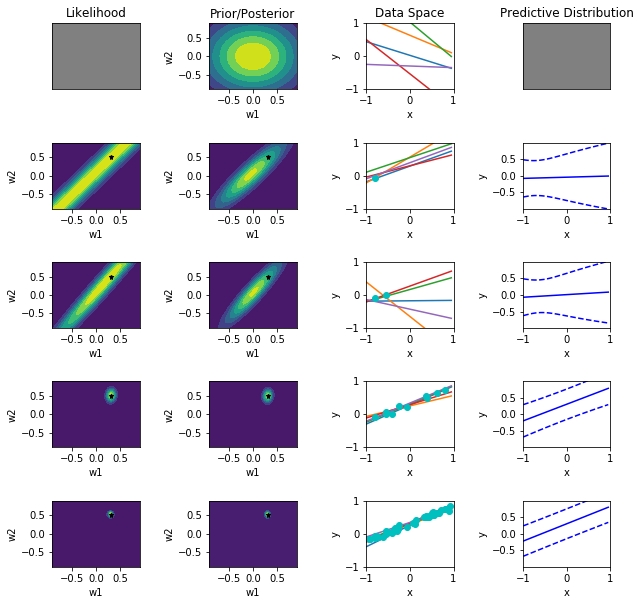

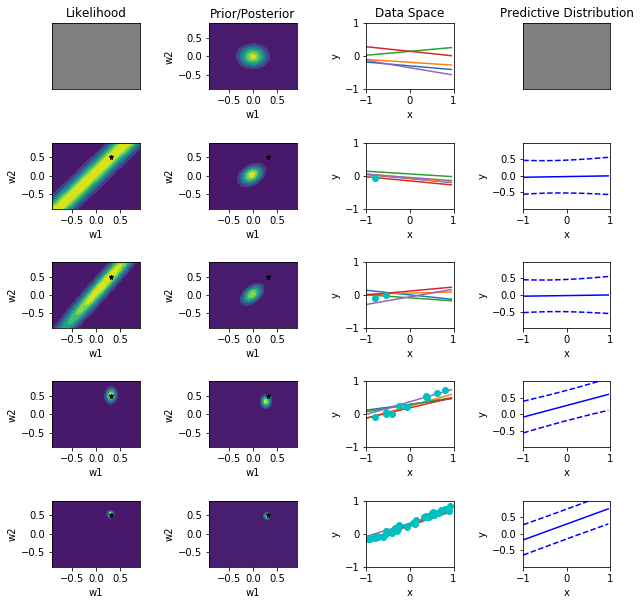

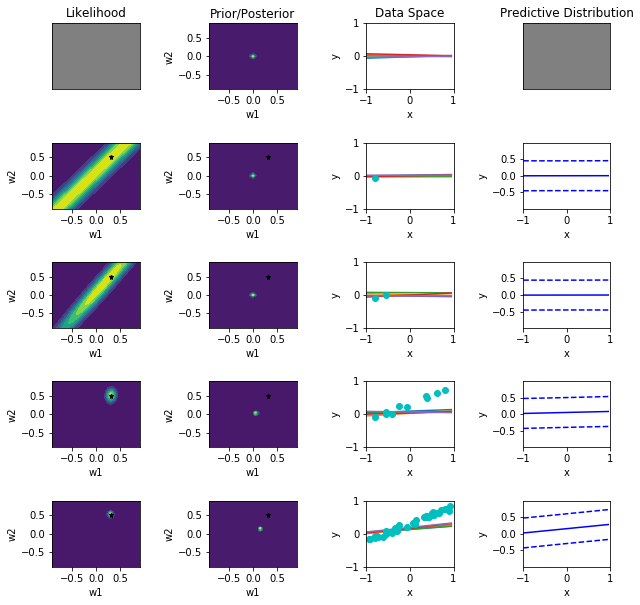

In [6]:
if __name__ == '__main__':

    '''
    If your implementations are correct, running
        python problem.py
    inside the Bayesian Regression directory will, for each sigma in sigmas_to-test generates plots
    '''

    np.random.seed(46134)
    actual_weights = np.matrix([[0.3], [0.5]])
    data_size = 40
    noise = {"mean":0, "var":0.2 ** 2}
    likelihood_var = noise["var"]
    xtrain, ytrain = support_code.generate_data(data_size, noise, actual_weights)

    #Question (b)
    sigmas_to_test = [1/2, 1/(2**5), 1/(2**10)]
    for sigma_squared in sigmas_to_test:
        prior = {"mean":np.matrix([[0], [0]]),
                 "var":matlib.eye(2) * sigma_squared}

        support_code.make_plots(actual_weights,
                                xtrain,
                                ytrain,
                                likelihood_var,
                                prior,
                                likelihood_func,
                                get_posterior_params,
                                get_predictive_params)

## Instructions (continued):

### 5.4:

If your implementations are correct, then the next few code blocks in this notebook will generate the required variants of Bishop's figure. These are the same figures that you would obtain if you ran `python problem.py` from the command line -- this notebook is just provided as additional support.

In [7]:
# Generate our simulated dataset
# Note we are using sigma == 0.2

np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
data_size = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = generate_data(data_size,
                               noise,
                               actual_weights)

Next, we generate the plots using 3 different prior covariance matrix. In the main call to `problem.py`, this is done in a loop -- here we wrap the loop body in a short helper function.

In [8]:
def make_plot_given_sigma(sigma_squared):
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    make_plots(actual_weights,
               xtrain,
               ytrain,
               likelihood_var,
               prior,
               likelihood_func,
               get_posterior_params,
               get_predictive_params)

In [9]:
sigmas = [1/2, 1/(2**5), 1/(2**10)]

#### First covariance matrix:
$$\Sigma_{0} = \frac{1}{2}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

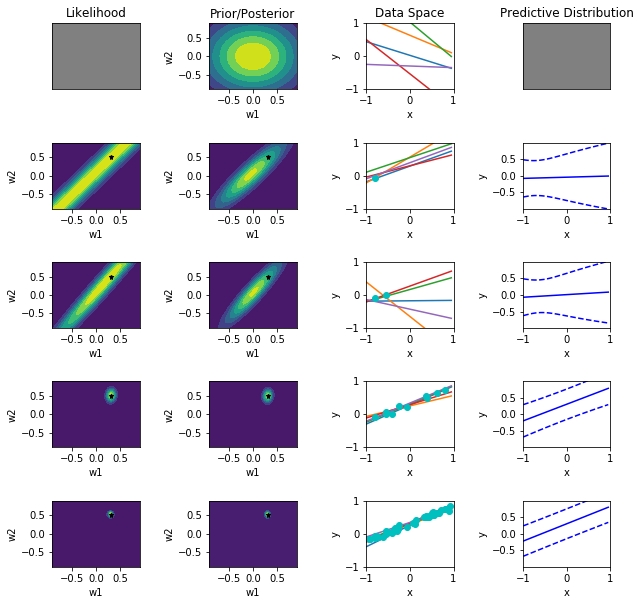

In [10]:
try:
    make_plot_given_sigma(sigmas[0])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

#### Second covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{5}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

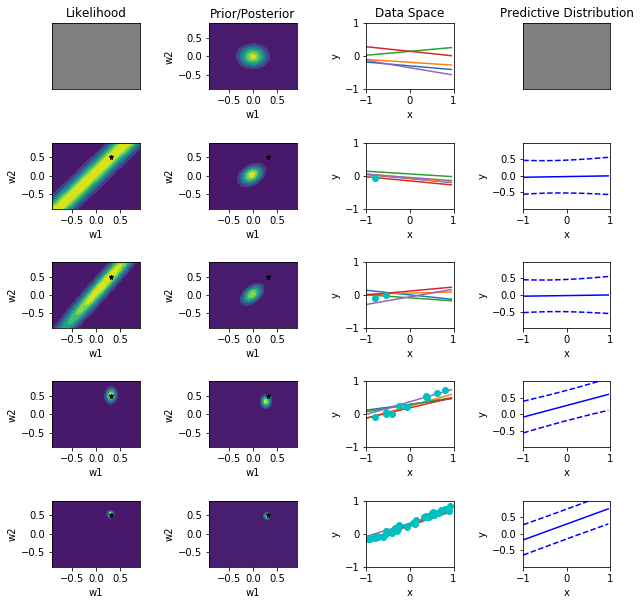

In [11]:
try:
    make_plot_given_sigma(sigmas[1])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

#### Third covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{10}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

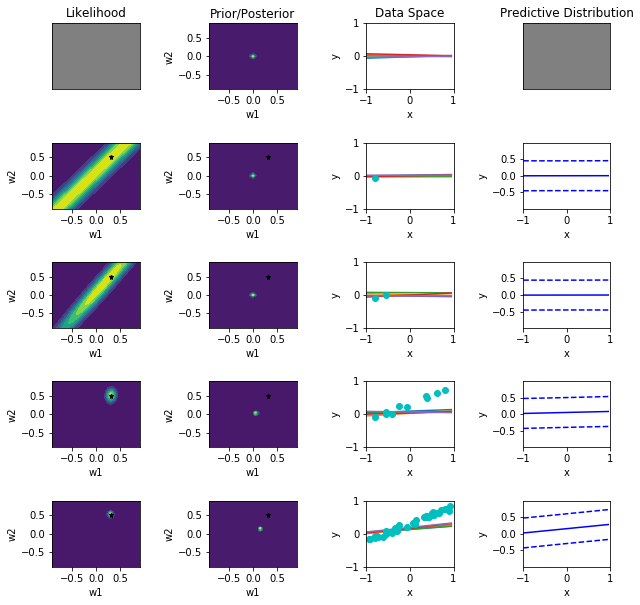

In [12]:
try:
    make_plot_given_sigma(sigmas[2])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

## Instructions (continued):

### 5.5:

For questiion (5) (Comment on your results ...) no code is required -- instead please answer with a written description.

## Instructions (continued):

### 5.6:

For question (6), find the MAP solution for the first prior covariance $\left(\frac{1}{2}I\right)$ by completing the implementation below. In addition, be sure to justify the value for the regularization coefficient (in `sklearn` named `alpha`) in your written work.

In [13]:
from sklearn.linear_model import Ridge

In [14]:
alpha = 0.08 # Change to the correct value
ridge = Ridge(alpha=alpha,
              fit_intercept=False,
              solver='cholesky')

ridge.fit(xtrain, ytrain)

Ridge(alpha=0.08, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

If alpha is set correctly, ridge.coef_ will equal the prior mean/MAP estimate returned by the next two cells.

In [15]:
ridge.coef_

array([[0.30052135, 0.52406189]])

In [17]:
prior = {"mean":np.matrix([[0], [0]]),
         "var":matlib.eye(2) * sigmas[0]}

try:
    post = get_posterior_params(xtrain, ytrain, prior,
                                likelihood_var = 0.2**2)
    post[0].ravel()
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

In [18]:
post[0]

matrix([[0.30052135],
        [0.52406189]])